In [1]:
# Import Libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# download apple stock data of 2 years starting from 1st Jan 2022.
apple_stock = yf.download("AAPL", start = "2022-01-01", end = "2023-12-31")
apple_stock.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953888,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669998,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225082,86709100


In [3]:
# Check the shape of the data
apple_stock.shape

(501, 6)

In [4]:
# Check if data has any duplicates in the columns
apple_stock.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
# Check numerical forms of the data
apple_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,163.512276,165.365749,161.818343,163.674351,162.803893,7.359234e+07
std,17.739105,17.436476,17.967710,17.703835,17.911214,2.536511e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,148.869995,150.919998,147.240005,149.350006,148.308395,5.414710e+07
50%,164.589996,166.330002,162.949997,165.020004,163.720093,6.924600e+07
75%,176.479996,177.990005,174.820007,176.279999,175.848328,8.670910e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.826020e+08


In [6]:
# Add calculated column to see daily returns on stock
apple_stock["Daily_Return"] = apple_stock["Adj Close"].pct_change()
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953888,104487900,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669998,99310400,-0.012692
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600,-0.026600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000,-0.016693
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225082,86709100,0.000989


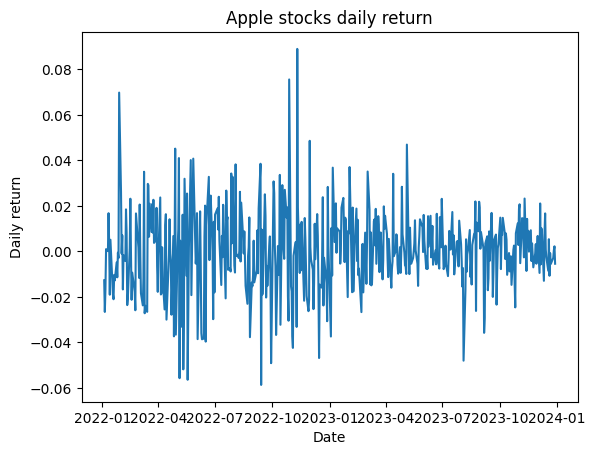

In [7]:
# Visual to check daily returns of stock
plt.plot(apple_stock["Daily_Return"])
plt.title("Apple stocks daily return")
plt.xlabel("Date")
plt.ylabel("Daily return")
plt.show()

In [8]:
# Check moving avarage of the stock
apple_stock["50_days_MA"] = apple_stock["Adj Close"].rolling(window = 50).mean()
apple_stock.tail()


,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_days_MA
Date,,,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,-0.005547,185.306513
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,-0.002841,185.595219
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700,0.000518,185.888522
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900,0.002226,186.221783
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800,-0.005424,186.560211


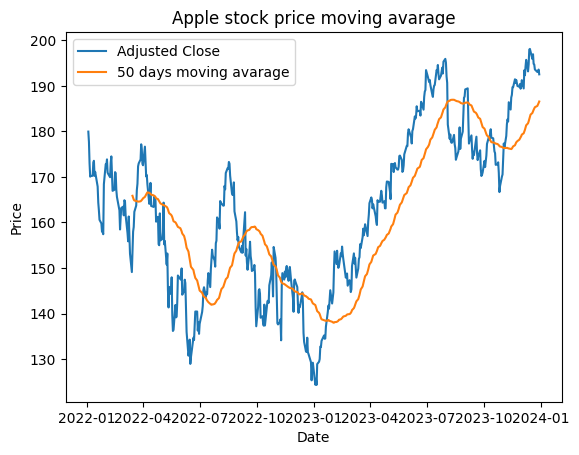

In [9]:
plt.plot(apple_stock["Adj Close"], label = "Adjusted Close")
plt.plot(apple_stock["50_days_MA"], label = "50 days moving avarage")
plt.title("Apple stock price moving avarage")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [10]:
# calculate volatility of the stock to check risk factor. The higher Volatility is higher risk.
volatility = apple_stock["Daily_Return"].std()
print(f" Volitality : {volatility}")


 Volitality : 0.018315885621329745


In [11]:
# calculate sharpe ratio to check risk adjusted return
risk_free_rate = 0.01

annual_return = (apple_stock["Daily_Return"].mean()+1) ** 510 - 1

# taking 255 working days per year as we are working with only weekdays. 255 * 2 years = 510
annual_volatility = apple_stock["Daily_Return"].std() * np.sqrt(510) 

sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility
print(f"Sharpe Ratio : {sharpe_ratio}")

Sharpe Ratio : 0.37866219802172923


A Sharpe Ratio of 0.38 suggests that the investment has a positive risk-adjusted return.

In [12]:
#SP 500 data
sp500 = yf.download("^GSPC", start = "2022-01-01", end = "2023-12-31")
sp500

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


In [13]:
# Calculate daily returns
sp500["Daily_return_sp500"] = sp500["Adj Close"].pct_change()
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_return_sp500
Date,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,NaN
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,-0.000630
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,-0.019393
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,-0.000964
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,-0.004050


In [14]:
# Calculate beta by concatinating two datas
joined_data = pd.concat([apple_stock["Daily_Return"], sp500["Daily_return_sp500"]], axis = 1).dropna()
joined_data.head()

,Daily_Return,Daily_return_sp500
Date,,
2022-01-04,-0.012692,-0.000630
2022-01-05,-0.026600,-0.019393
2022-01-06,-0.016693,-0.000964
2022-01-07,0.000989,-0.004050
2022-01-10,0.000116,-0.001441


In [15]:
beta = joined_data.cov().iloc[0,1] / joined_data["Daily_return_sp500"].var()

In [16]:
print(f"beta : {beta}")

beta : 1.2642395912005613


A beta of 1.26 indicates that, on average, the asset tends to move about 1.26 times as much as the market. If the market goes up, the asset is expected to go up more, and if the market goes down, the asset is expected to go down more.

In [17]:
apple_stock["20_days_moving_avg"] = apple_stock["Adj Close"].rolling(window = 20).mean()

In [18]:
apple_stock["Upper_band"] = apple_stock["20_days_moving_avg"] + 2 * apple_stock["Adj Close"].rolling(window = 20).std()

In [19]:
apple_stock["Lower_Band"] = apple_stock["20_days_moving_avg"] - 2 * apple_stock["Adj Close"].rolling(window = 20).std()

In [20]:
apple_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_days_MA,20_days_moving_avg,Upper_band,Lower_Band
Date,,,,,,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,-0.005547,185.306513,193.668501,199.490535,187.846466
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,-0.002841,185.595219,193.831501,199.372064,188.290938
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700,0.000518,185.888522,193.969001,199.282852,188.655150
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900,0.002226,186.221783,194.179501,199.040519,189.318484
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800,-0.005424,186.560211,194.308501,198.821393,189.795610


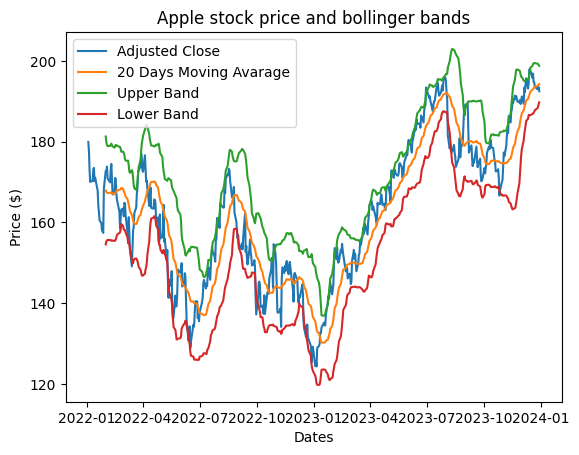

In [21]:
plt.plot(apple_stock["Adj Close"], label = "Adjusted Close")
plt.plot(apple_stock["20_days_moving_avg"], label = "20 Days Moving Avarage")
plt.plot(apple_stock["Upper_band"], label = "Upper Band")
plt.plot(apple_stock["Lower_Band"], label = "Lower Band")
plt.title("Apple stock price and bollinger bands")
plt.xlabel("Dates")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [22]:
# Evaluating the speed and change of price movements to check traders and identify overbought or oversold conditions.
delta = apple_stock["Adj Close"].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window = 14).mean()
loss = (-delta.where(delta <0, 0)).rolling(window = 14).mean()

In [23]:
rs = gain / loss

In [24]:
apple_stock["RSI"] = 100 - (100 / (1 + rs))
apple_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_days_MA,20_days_moving_avg,Upper_band,Lower_Band,RSI
Date,,,,,,,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,-0.005547,185.306513,193.668501,199.490535,187.846466,59.246142
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,-0.002841,185.595219,193.831501,199.372064,188.290938,49.031934
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700,0.000518,185.888522,193.969001,199.282852,188.655150,52.291513
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900,0.002226,186.221783,194.179501,199.040519,189.318484,47.920430
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800,-0.005424,186.560211,194.308501,198.821393,189.795610,40.185177


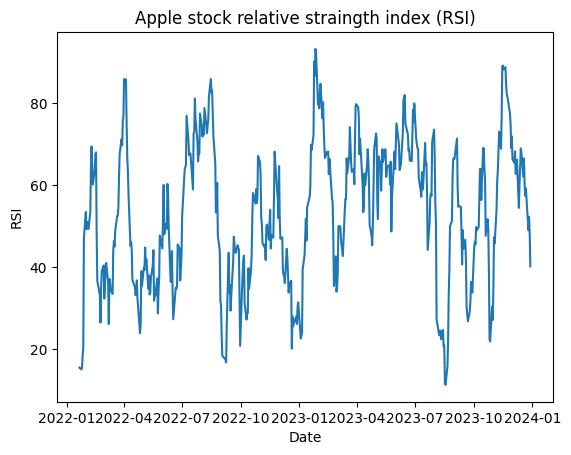

In [25]:
plt.plot(apple_stock["RSI"])
plt.title("Apple stock relative straingth index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.show()